In [ ]:
"""
Griffin Lyons
CS 677
Analyzing Presidents - HW 5"""

In [157]:
"""Question 1:
I will read the US presidents file - as provided with the assignment,
not as downloaded directly from Kaggle - into a pandas dataframe,
with all entries properly divided into the right columns."""

import pandas as pd

"""In inspecting why this file would not read properly into a dataframe,
I discovered that not only was it encoded in ANSI rather than, say,
UTF-8 or UTF-16, but it was tab separated instead of comma separated.
My suspicion was piqued when Excel could not open the file without
concatenating every row into one cell, but LibreOffice Calc could -
This told me that there was probably an encoding issue at play if not
more. This saved me significant amounts of time in data cleaning."""

pres_df = pd.read_csv('US-Presidents.csv', sep='\t', encoding='ANSI')

#show that it works
pres_df.head()

,No.,President,Born,start of presidency,end of presidency,Post-presidency,Died,Age,Net worth((millions of 2022 US$)),Political party[11],...,Weight (lbs),Number of kids,Number of marriages,State,Ethnic Origin,Religion(s),% of Budget Allocated to Defense,Wars During Tenure,Education,Degree
0,1,George Washington,"Feb 22, 1732[a]","57 years, 67 days","65 years, 10 days","2 years, 285 days","Dec 14, 1799","67 years, 295 days",707,None/Independent,...,175,0,1,Virginia,"English, other European",Episcopal,NaN,None,No formal education,NaN
1,2,John Adams,"Oct 30, 1735[a]","61 years, 125 days","65 years, 125 days","25 years, 122 days","Jul 4, 1826","90 years, 247 days",25,Federalist,...,165,5,1,Massachusetts,"English, other European","Congregationalist, Unitarian",NaN,Quasi-War with France,Harvard College (graduated in 1755),A.B.
2,3,Thomas Jefferson,"Apr 13, 1743[a]","57 years, 325 days","65 years, 325 days","17 years, 122 days","Jul 4, 1826","83 years, 82 days",284,Democratic-Republican,...,175,6,1,Virginia,"English, Scottish, Welsh","Episcopalian, Unitarian, Deist",8.60%,Barbary Wars,The College of William & Mary (graduated in 1762),B.A.
3,4,James Madison,"Mar 16, 1751[a]","57 years, 353 days","65 years, 353 days","19 years, 116 days","Jun 28, 1836","85 years, 104 days",136,Democratic-Republican,...,100,0,1,Virginia,English,Episcopalian,67.10%,War of 1812,The College of New Jersey (now Princeton Unive...,B.A.
4,5,James Monroe,"Apr 28, 1758","58 years, 310 days","66 years, 310 days","6 years, 122 days","Jul 4, 1831","73 years, 67 days",36,Democratic-Republican,...,190,3,1,Virginia,"Scottish, Welsh",Episcopalian,NaN,None,The College of William & Mary (did not graduate),NaN


In [ ]:
"""Next we will remove the living presidents from our dataset. 
Jimmy Carter (president 39) and all presidents after George H. W. Bush
are still alive, so we will remove those."""
pres_df = pres_df.drop([38, 41, 42, 43, 44, 45])

<Axes: title={'center': 'Political affiliation'}>

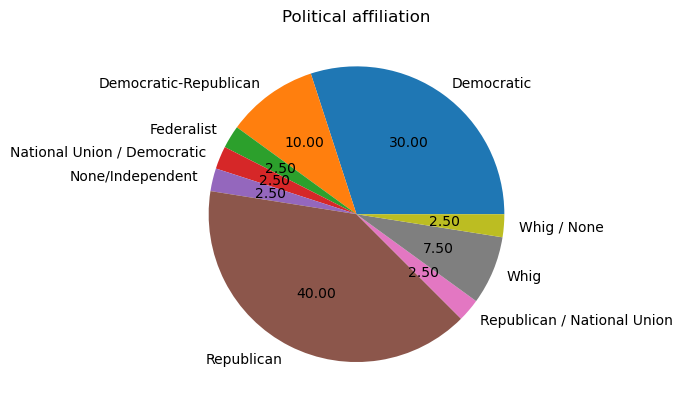

In [28]:
"""Question 2: Construct a pie chart of political affiliation"""
#Pandas' groupby feature lets us construct a pie chart out of categorical features
#get 'ylabel' out of the way for visual clarity, use title param
#specify type of chart, and set it to display percentages
pres_df.groupby('Political party[11]').\
size().plot(title="Political affiliation",ylabel='', kind='pie', autopct='%.2f')

In [30]:
"""Question 3: Did any presidents switch political parties?
Yes. Looking at the chart, you can see several presidents changed parties or were
expelled (John Tyler was expelled from the Whigs) as indicated
by the slash in the label ('Democratic-Republican' was a specific political movement).
We can tabulate this with code."""

party_switch = pres_df['President'].loc[pres_df['Political party[11]'].str.contains('/')]
print(party_switch)

0     George Washington
9            John Tyler
15      Abraham Lincoln
16       Andrew Johnson
Name: President, dtype: object


<Axes: title={'center': 'Presidential religion by political party'}>

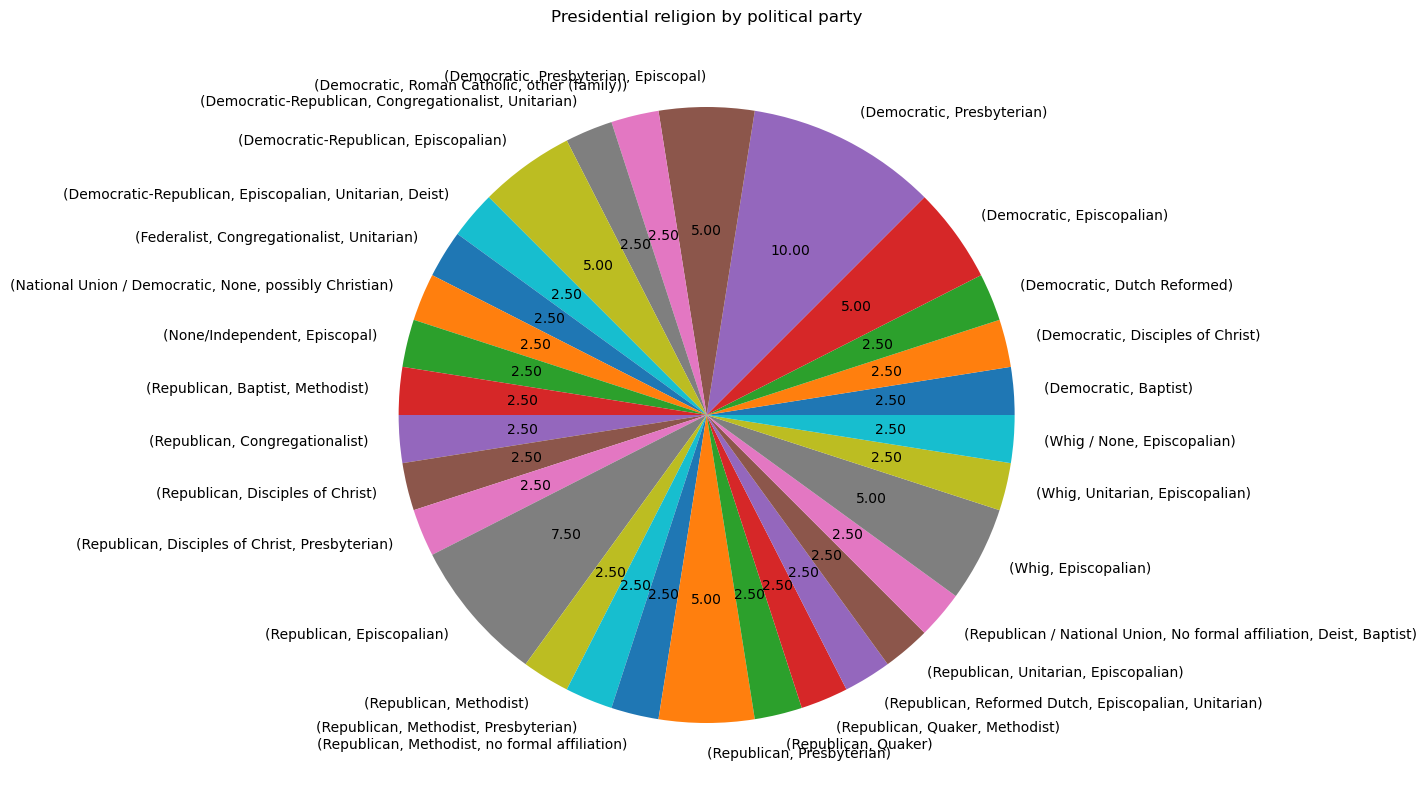

In [41]:
"""Question 4: Construct a pie chart of religious affiliations by party.
We'll do this with another pie chart and again using groupby(), this time with
multiple columns. We'll put political party first to group it correctly."""
pres_df.groupby(['Political party[11]',"Religion(s)"])\
.size().plot(title=\
             "Presidential religion by political party",ylabel='', kind='pie', autopct='%.2f',\
             figsize = (20,10))

In [159]:
"""Question 5: Draw lines showing the age at the start of the presidency by major parties 
(Democratic, Republican, other). What was the median age in the 18, 19, and 20th century
(by party)? Any trends?
We will construct a plot where the x axis is the year and the y axis is 
age at start of presidency."""
pres_party_df = pres_df
pres_party_df.reset_index(drop=True,inplace=True)
#create placeholder column
pres_party_df['Simplified Party'] = ''
for index, rows in pres_party_df.iloc[:].iterrows():
    if pres_party_df['Political party[11]'].iloc[index] == 'Democratic':
        pres_party_df.at[index,'Simplified Party'] = "Democratic"
    elif pres_party_df['Political party[11]'].iloc[index] == 'Republican':
        pres_party_df.at[index,'Simplified Party'] = "Republican"
    else:
        pres_party_df.at[index,'Simplified Party'] = "Other"

In [160]:
"""Now we need to turn the age string into an integer"""
pres_party_df['Age at Start of Presidency'] = 0
for index, rows in pres_party_df.iloc[:].iterrows():
    age_string = pres_party_df['start of presidency'].iloc[index]
    #turn the age string into a list with split
    age_list = age_string.split(", ")
    #use split again to get our years and days as integers
    #we use the indices in each list created by the splits
    #to get the part we want
    years = int(age_list[0].split()[0])
    days = int(age_list[1].split()[0])
    age_int = years + (days/365)
    pres_party_df.at[index, 'Age at Start of Presidency'] = age_int

In [161]:
"""Now we need the year they took office, which we can get from
the 'Years in Office' column with a method similar to the above. But now we need to
use the regular expressions module, re, because there are multiple delimiters"""
import re as re
pres_party_df['First Year in Office'] = 0
for index, rows in pres_party_df.iloc[:].iterrows():
    year_string = pres_party_df['Years in office'].iloc[index]
    #Turn the year string into a list with split, this time on the hyphen
    #the hyphens chosen are not consistent - some are "–", some are "-"
    #so we use the re module's split function here
    year_list = re.split('–|-', year_string)
    #this time getting the first year in office is simpler
    first_year_int = int(year_list[0])
    pres_party_df.at[index, 'First Year in Office'] = first_year_int

<Axes: xlabel='First Year in Office'>

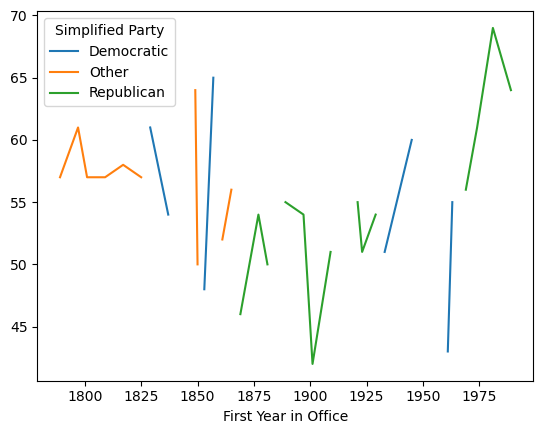

In [65]:
"""We will plot these lines with the help of pivot tables"""
pres_party_df.pivot_table(index="First Year in Office", \
                          columns = 'Simplified Party', \
                          values = 'Age at Start of Presidency').plot(kind='line')

In [68]:
"""Now we want to find the median age by century"""
#18th century - use subsetting to filter for years before 1800
pres_18_c_median = pres_party_df['Age at Start of Presidency'].\
loc[pres_party_df['First Year in Office']<1800].median()
print(pres_18_c_median)
#19th century - subset between 1800 and 1900
pres_19_c_median = pres_party_df['Age at Start of Presidency'].\
loc[(pres_party_df['First Year in Office']>=1800)&(pres_party_df['First Year in Office']<1900)].median()
print(pres_19_c_median)
#20th century - only have to filter for 1900 or later
pres_20_c_median = pres_party_df['Age at Start of Presidency'].\
loc[pres_party_df['First Year in Office']>=1900].median()
print(pres_20_c_median)

59.0
54.0
55.0


In [106]:
"""Question 6: What percentage of US ex-presidents were trained as lawyers (for each party)?"""
#We'll count how many presidents belong to each simplified party
print(pres_party_df['Simplified Party'].value_counts())
#Now, using subsetting, the series str.contains method, and the pipe OR operator, we'll
#get a count of how many presidents there were with law education or training
#i use ' law' with a space in front to exclude the University of Delaware from our count
#and case=False to make the check case-insensitive
print(pres_party_df['Simplified Party'].
      loc[(pres_party_df['Education'].str.contains(' law',case=False))|
         (pres_party_df['Degree'].str.contains(' law',case=False))].value_counts())
#There were 2 democrats and one "other" trained in law. However, that 'Other' is Abraham Lincoln
#who is listed as Republican/National Union Party. the NUP was a wartime name used by
#The Republican Party during the Civil War. So we will count him as Republican
dems_law_pct = 2/12
other_law_pct = 0
repub_law_pct = 1/12
print("The percentage of Democratic presidents trained as lawyers is", "{:.2%}".format(dems_law_pct))
print("The percentage of Republican presidents trained as lawyers is", "{:.2%}".format(repub_law_pct))
print("The percentage of other party presidents trained as lawyers is", "{:.2%}".format(other_law_pct))

Republican    16
Other         12
Democratic    12
Name: Simplified Party, dtype: int64
Democratic    2
Other         1
Name: Simplified Party, dtype: int64
The percentage of Democratic presidents trained as lawyers is 16.67%
The percentage of Republican presidents trained as lawyers is 8.33%
The percentage of other party presidents trained as lawyers is 0.00%


In [164]:
"""Question 7: Construct a pie chart of education level for all presidents.
First we have to fill the NaNs, since not all presidents attended or graduated
from institutes of higher learning. Then we'll create a simplified list
since many of the degree listings are overly specific"""

pres_party_df['Degree'] = pres_party_df['Degree'].fillna('High School')
#create a placeholder
pres_party_df['Simplified Degree'] = ''
#We'll proceed through the degrees in order (later ones may overwrite some earlier values)
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('B.A.')] = 'B.A.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('A.B.')] = 'B.A.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('B.S.')] = 'B.S.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('M.A.')] = 'M.A.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('J.D.')] = 'J.D.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('Ph.D.')] = 'Ph.D.'
pres_party_df['Simplified Degree'].loc[pres_party_df['Degree']=='High School'] = 'High School'

C:\Users\Owner\AppData\Local\Temp\ipykernel_11968\3490696930.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('B.A.')] = 'B.A.'
C:\Users\Owner\AppData\Local\Temp\ipykernel_11968\3490696930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pres_party_df['Simplified Degree'].loc[pres_party_df['Degree'].str.contains('A.B.')] = 'B.A.'
C:\Users\Owner\AppData\Local\Temp\ipykernel_11968\3490696930.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

<Axes: title={'center': 'Presidential Education Level'}>

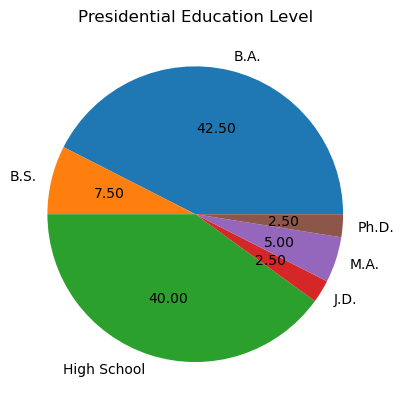

In [118]:
#Now we can graph it in a pie chart
pres_party_df.groupby('Simplified Degree').\
size().plot(title="Presidential Education Level",ylabel='', kind='pie', autopct='%.2f')

In [165]:
"""Question 8: Draw mean and median percentage of budget allocated to defense
First, we'll replace NaNs with 0"""
pres_party_df['% of Budget Allocated to Defense'] = \
pres_party_df['% of Budget Allocated to Defense'].fillna(0)

In [166]:
"""Now we have to strip text from the non-0 entries, because they are strings.
Some presidents have multiple figures. We're going to calculate the mean and median by
making a new Pandas dataframe."""

#create a placeholder list
budget_list = []
year_list = []

for index, rows in pres_party_df.iloc[:].iterrows():
    budget_str = pres_party_df['% of Budget Allocated to Defense'].iloc[index]
    year = pres_party_df['First Year in Office'].iloc[index] #for our x axis in the plot
    if budget_str == 0: #if it's the simple int that we replaced the NaNs with
        budget_list.append(float(budget_str)) #just go ahead and append it to the list as float
        year_list.append(year) #append year
    else:
        #use re module again to handle either "%, " or "% for multi-figure entries
        budget_split_list = re.split('%, |%', budget_str)
        if len(budget_split_list) == 2: #if the split is just one number and one %
            budget_list.append(float(budget_split_list[0])) #float it and append to the list
            year_list.append(year) #append year to the list
        elif len(budget_split_list) > 2: #if the split is two numbers
            budget_list.append(float(budget_split_list[0])) #append first number
            year_list.append(year)
            budget_list.append(float(budget_split_list[1]))#append second number
            year_list.append(year+4) #append year + 4 to represent multiple terms

budget_df = pd.DataFrame({"budget":budget_list, "year":year_list})

In [167]:
"""Now we can find the mean and the median."""
budget_mean = budget_series.mean()/100 #turn back into a proper percentage
budget_median = budget_series.median()
print("{:.2%}".format(budget_mean))
print("{:.2%}".format(budget_median))
"""They are 22.72% and 0%"""

22.72%
0.00%


'They are 22.72% and 0%'

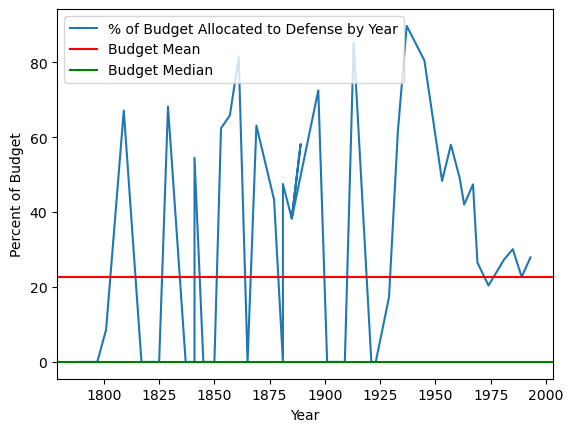

In [173]:
"""Now we can plot them"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
line1, = ax.plot(year_list, budget_list,
                 label = "% of Budget Allocated to Defense by Year")
plt.axhline(budget_mean*100, color = 'red', label = "Budget Mean") 
plt.axhline(budget_median, color = 'green', label="Budget Median")
plt.xlabel("Year")
plt.ylabel("Percent of Budget")
ax.legend(loc='best')
plt.show()

In [ ]:
"""Question 9: List three interesting facts that you learned from this dataset
but did not know before.

1. John Tyler changed political affiliations because his original party expelled him
in a power struggle
2. During the Civil War, the Republican Party in some states also used the name
'National Unity Party'
3. There are surprisingly few lawyers in the history of our country's presidents.
I thought for sure there would be more."""